# 01. Import Libraries

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl 

In [3]:
# Prompt matplotlib visuals to appear in the notebook 
%matplotlib inline

# 02. Import Data

In [4]:
path = r"C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis"

In [5]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_combined_transactions.pkl'))

# 03. Data Wrangling

In [6]:
df.shape

(24386833, 52)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386833 entries, 0 to 24386832
Data columns (total 52 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   user_id                     int64         
 1   card_index                  int64         
 2   txn_year                    int64         
 3   txn_month                   int64         
 4   txn_day                     int64         
 5   txn_date                    datetime64[ns]
 6   txn_time                    object        
 7   txn_amount                  float64       
 8   txn_flag                    object        
 9   txn_type                    object        
 10  merchant_name               int64         
 11  merchant_city               object        
 12  merchant_state              object        
 13  merchant_country            object        
 14  txn_zip_code                Int64         
 15  MCC                         int64         
 16  errors?         

In [8]:
print(df['Income_category'].unique())
print(df['Age Group'].unique())
print(df['gender'].unique())

['Medium income' 'Low income' 'High income']
['Adult' 'Senior' 'Young Adult']
['Female' 'Male']


In [9]:
# Convert Income category: Low = 1, Medium = 2, High = 3
income_mapping = {'Low income': 0, 'Medium income': 1, 'High income': 2}
df['#_income_category'] = df['Income_category'].map(income_mapping)

In [10]:
# Convert Gender: Male = 2, Female = 1
gender_mapping = {'Male': 2, 'Female': 1}
df['#_gender'] = df['gender'].map(gender_mapping)

In [11]:
# Convert Age group: Young Adult = 0, Adult = 1, Senior = 2
age_mapping = {'Young Adult': 0, 'Adult': 1, 'Senior': 2}
df['#_age_group'] = df['Age Group'].map(age_mapping)

In [12]:
print(df['#_age_group'].unique())
print(df['#_income_category'].unique())
print(df['#_gender'].unique())

[1 2 0]
[1 0 2]
[1 2]


In [13]:
# Create Grouped Dataframe for new column check
df_grouped = df.groupby('user_id').first().reset_index()

In [14]:
# Check to make sure numbers where assigned correctly to age group
print(df_grouped[['user_id', '#_age_group', 'Age Group']].head(10))

   user_id  #_age_group    Age Group
0        0            1        Adult
1        1            1        Adult
2        2            2       Senior
3        3            1        Adult
4        4            1        Adult
5        5            1        Adult
6        6            1        Adult
7        7            0  Young Adult
8        8            2       Senior
9        9            1        Adult


In [15]:
# Check to make sure numbers where assigned correctly to income category
print(df_grouped[['user_id', '#_income_category', 'Income_category']].head(10))

   user_id  #_income_category Income_category
0        0                  1   Medium income
1        1                  1   Medium income
2        2                  0      Low income
3        3                  2     High income
4        4                  2     High income
5        5                  0      Low income
6        6                  1   Medium income
7        7                  1   Medium income
8        8                  0      Low income
9        9                  0      Low income


In [16]:
# Check to make sure numbers where assigned correctly to gender
print(df_grouped[['user_id', '#_gender', 'gender']].head(10))

   user_id  #_gender  gender
0        0         1  Female
1        1         1  Female
2        2         1  Female
3        3         1  Female
4        4         2    Male
5        5         2    Male
6        6         1  Female
7        7         2    Male
8        8         1  Female
9        9         1  Female


In [17]:
# Remove unnecessary columns (categorical, datetime, text, and ID-like columns)
df = df.drop(columns = [
    'card_index',
    'txn_time',
    'txn_flag',
    'txn_type',
    'merchant_name',
    'merchant_city',
    'merchant_state',
    'merchant_country',
    'txn_zip_code',
    'MCC',
    'user_name',
    'Age Group',
    'gender',
    'address',
    'apartment',
    'city',
    'state',
    'user_zip_code',
    'Income_category',
    'Income Bracket',
    'card_brand',
    'card_type',
    'card_number',
    'expires',
    'CVV',
    'has_chip',
    'card_on_dark_web',
    'Credit Limit Category',
    'Amount Category',
    'txn_date',
    'birth_year',
    'birth_month',
    'acct_open_date',
    'year_PIN_last_changed',
    'cards_issued',
    'num_credit_cards',
    'errors?',
    'is_fraud?'], errors='ignore')

In [18]:
# View Columns
df.columns

Index(['user_id', 'txn_year', 'txn_month', 'txn_day', 'txn_amount',
       'current_age', 'retirement_age', 'latitude', 'longitude',
       'per_capita_income_zip_code', 'yearly_income_person', 'total_debt',
       'FICO_score', 'credit_limit', '#_income_category', '#_gender',
       '#_age_group'],
      dtype='object')

# 04. Elbow Technique

### Create features and scale for elbow technique

In [19]:
#Create a feature of the columns you want to cluster using the kmeans algorithm (financial features)
features = ['yearly_income_person', 'total_debt', 'FICO_score', 'credit_limit']
X = df[features]

In [20]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [21]:
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled

array([[ 0.53521014,  1.31508946,  1.11288426,  0.74256268],
       [ 0.53521014,  1.31508946,  1.11288426,  0.74256268],
       [ 0.53521014,  1.31508946,  1.11288426,  0.74256268],
       ...,
       [ 0.78920478,  2.33604603, -0.58790917, -0.07003761],
       [ 0.78920478,  2.33604603, -0.58790917, -0.07003761],
       [ 0.78920478,  2.33604603, -0.58790917, -0.07003761]])

### Executing Elbow Technique

In [23]:
# Set up range of cluster numbers
num_cl = range(1, 10)
kmeans_models = [KMeans(n_clusters=i, random_state=42) for i in num_cl]

In [24]:
# Score kmean model
score = [kmeans_models[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_models))]

score

[-97547331.99976376,
 -72504378.16588894,
 -60413473.17989598,
 -51029899.96640957,
 -46566376.38751019,
 -41539958.688820735,
 -37950159.05301015,
 -35775353.81691426,
 -33549819.838919424]

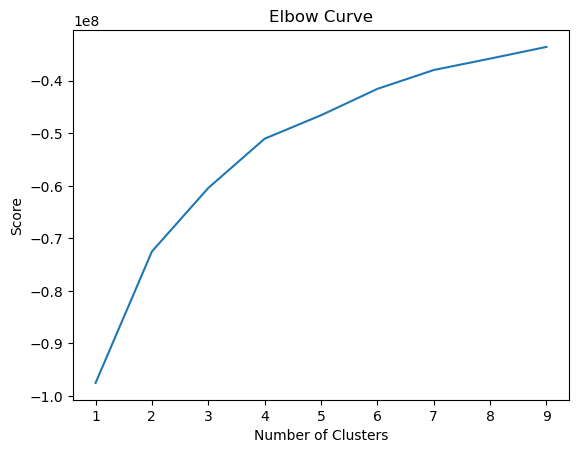

In [25]:
# Plot Elbow
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


We will use 3 as the optimal number of clusters and if it doesn't work we will change it.

The optimal number of clusters seems to be 3.

# 05. Create new dataframe

### Aggragate by User Dataframe

In [26]:
df_user_txn = df.groupby('user_id').agg({
    'txn_amount': ['mean', 'sum', 'count'],
    'yearly_income_person': 'first',
    'total_debt': 'first',
    'credit_limit': 'first',
    'txn_year': 'first',
    'FICO_score': 'first',
    '#_age_group': 'first',
    '#_income_category': 'first',
    '#_gender': 'first',
}).reset_index()
df_user_txn.columns = ['user_id', 'txn_avg', 'txn_sum', 'txn_count', 'yearly_income_person', 'total_debt', 'credit_limit', 
                       'txn_year', 'FICO_score', '#_age_group', '#_income_category', '#_gender']

In [27]:
df_user_txn.columns

Index(['user_id', 'txn_avg', 'txn_sum', 'txn_count', 'yearly_income_person',
       'total_debt', 'credit_limit', 'txn_year', 'FICO_score', '#_age_group',
       '#_income_category', '#_gender'],
      dtype='object')

# 06. K-means Clustering

### Add Cluster Column to df

In [28]:
# Assign number of cluster to original df
kmeans = KMeans(n_clusters=3, random_state=42)  
df['cluster'] = kmeans.fit_predict(X_scaled)    

In [29]:
# Check columns
df_unique_users = df.drop_duplicates(subset='user_id')
df_unique_users.head(20)

,user_id,txn_year,txn_month,txn_day,txn_amount,current_age,retirement_age,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,credit_limit,#_income_category,#_gender,#_age_group,cluster
0,0,2002,9,1,134.09,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2
19963,1,2003,9,1,65.06,53,68,40.76,-73.74,37891.0,77254.0,191349.0,701,27500.0,1,1,1,2
28882,2,2009,9,26,948.44,81,67,34.02,-117.89,22681.0,33483.0,196.0,698,31599.0,0,1,2,0
70860,3,2010,12,17,1195.46,63,63,40.71,-73.99,163145.0,249925.0,202328.0,722,98100.0,2,1,1,2
80977,4,1999,11,26,1300.73,43,70,37.76,-122.44,53797.0,109687.0,183855.0,675,34900.0,2,2,1,2
99519,5,2002,1,1,45.61,42,70,41.55,-90.60,20599.0,41997.0,0.0,704,9900.0,0,2,1,0
121207,6,2004,5,21,851.14,36,67,38.22,-85.74,25258.0,51500.0,102286.0,672,29964.0,1,1,1,2
149444,7,2020,1,1,7.06,26,67,45.51,-122.64,26790.0,54623.0,114711.0,728,17480.0,1,2,0,0
149680,8,2009,11,1,13.64,81,66,40.32,-75.32,26273.0,42509.0,2895.0,755,26546.0,0,1,2,0
173050,9,2009,6,12,1161.92,34,60,29.97,-92.12,18730.0,38190.0,81262.0,810,9496.0,0,1,1,0


### Create cluster color column for df

In [30]:
# Check actual income means per cluster
income_means = df.groupby('cluster')['yearly_income_person'].mean().sort_values()
print(income_means)

cluster
0    39655.071913
1    41646.960153
2    85713.893793
Name: yearly_income_person, dtype: float64


In [31]:
# Create mapping based on actual income ranking
income_order = income_means.index.tolist()  # e.g., [1, 0, 2]

cluster_to_color = {
    income_order[0]: 'yellow',  # lowest income
    income_order[1]: 'red',     # medium income
    income_order[2]: 'blue'     # highest income
}

# Apply color map to dataframe
df['cluster_color'] = df['cluster'].map(cluster_to_color)

In [32]:
# Check columns
df_unique_users = df.drop_duplicates(subset='user_id')
df_unique_users.head(20)

,user_id,txn_year,txn_month,txn_day,txn_amount,current_age,retirement_age,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,credit_limit,#_income_category,#_gender,#_age_group,cluster,cluster_color
0,0,2002,9,1,134.09,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
19963,1,2003,9,1,65.06,53,68,40.76,-73.74,37891.0,77254.0,191349.0,701,27500.0,1,1,1,2,blue
28882,2,2009,9,26,948.44,81,67,34.02,-117.89,22681.0,33483.0,196.0,698,31599.0,0,1,2,0,yellow
70860,3,2010,12,17,1195.46,63,63,40.71,-73.99,163145.0,249925.0,202328.0,722,98100.0,2,1,1,2,blue
80977,4,1999,11,26,1300.73,43,70,37.76,-122.44,53797.0,109687.0,183855.0,675,34900.0,2,2,1,2,blue
99519,5,2002,1,1,45.61,42,70,41.55,-90.60,20599.0,41997.0,0.0,704,9900.0,0,2,1,0,yellow
121207,6,2004,5,21,851.14,36,67,38.22,-85.74,25258.0,51500.0,102286.0,672,29964.0,1,1,1,2,blue
149444,7,2020,1,1,7.06,26,67,45.51,-122.64,26790.0,54623.0,114711.0,728,17480.0,1,2,0,0,yellow
149680,8,2009,11,1,13.64,81,66,40.32,-75.32,26273.0,42509.0,2895.0,755,26546.0,0,1,2,0,yellow
173050,9,2009,6,12,1161.92,34,60,29.97,-92.12,18730.0,38190.0,81262.0,810,9496.0,0,1,1,0,yellow


# 07. Merge dataframe

### Merge cluster columns to the aggregate user df

In [33]:
# Merge cluster info from df into df_user_txn
df_user_txn = df_user_txn.merge(
    df[['user_id', 'cluster', 'cluster_color']],  # take only needed columns
    on='user_id',
    how='left')  # keeps all rows in df_user_txn

In [34]:
# Check columns
df_user_txn_unique = df.drop_duplicates(subset='user_id')
df_user_txn_unique.head(20)

,user_id,txn_year,txn_month,txn_day,txn_amount,current_age,retirement_age,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,credit_limit,#_income_category,#_gender,#_age_group,cluster,cluster_color
0,0,2002,9,1,134.09,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
19963,1,2003,9,1,65.06,53,68,40.76,-73.74,37891.0,77254.0,191349.0,701,27500.0,1,1,1,2,blue
28882,2,2009,9,26,948.44,81,67,34.02,-117.89,22681.0,33483.0,196.0,698,31599.0,0,1,2,0,yellow
70860,3,2010,12,17,1195.46,63,63,40.71,-73.99,163145.0,249925.0,202328.0,722,98100.0,2,1,1,2,blue
80977,4,1999,11,26,1300.73,43,70,37.76,-122.44,53797.0,109687.0,183855.0,675,34900.0,2,2,1,2,blue
99519,5,2002,1,1,45.61,42,70,41.55,-90.60,20599.0,41997.0,0.0,704,9900.0,0,2,1,0,yellow
121207,6,2004,5,21,851.14,36,67,38.22,-85.74,25258.0,51500.0,102286.0,672,29964.0,1,1,1,2,blue
149444,7,2020,1,1,7.06,26,67,45.51,-122.64,26790.0,54623.0,114711.0,728,17480.0,1,2,0,0,yellow
149680,8,2009,11,1,13.64,81,66,40.32,-75.32,26273.0,42509.0,2895.0,755,26546.0,0,1,2,0,yellow
173050,9,2009,6,12,1161.92,34,60,29.97,-92.12,18730.0,38190.0,81262.0,810,9496.0,0,1,1,0,yellow


# 08. Plotting 

### Full df plot

In [35]:
df['cluster'].value_counts()

cluster
0    13271716
1     7771888
2     3343229
Name: count, dtype: int64

In [36]:
df.head()

,user_id,txn_year,txn_month,txn_day,txn_amount,current_age,retirement_age,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,credit_limit,#_income_category,#_gender,#_age_group,cluster,cluster_color
0,0,2002,9,1,134.09,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
1,0,2002,9,1,38.48,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
2,0,2002,9,2,120.34,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
3,0,2002,9,2,128.95,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue
4,0,2002,9,3,104.71,53,66,34.15,-117.76,29278.0,59696.0,127613.0,787,24295.0,1,1,1,2,blue


In [37]:
# Group by cluster using the original (unscaled) data
cluster_summary = df.groupby('cluster_color').agg({
    'total_debt': ['mean', 'median'],
    'FICO_score': ['mean', 'median'],
    'yearly_income_person': ['mean', 'median'],
    'credit_limit': ['mean', 'median'],
    'txn_amount': ['mean', 'median']})

In [38]:
# View results
print(cluster_summary)

                  total_debt            FICO_score         \
                        mean    median        mean median   
cluster_color                                               
blue           122860.459692  120771.0  708.480268  715.0   
red             65941.795341   63264.0  648.757921  661.0   
yellow          37946.306844   29627.0  750.667287  746.0   

              yearly_income_person           credit_limit          txn_amount  \
                              mean   median          mean   median       mean   
cluster_color                                                                   
blue                  85713.893793  74016.0  33329.163650  30024.0  58.425985   
red                   41646.960153  40336.0  11211.967312  11002.0  41.875366   
yellow                39655.071913  37558.0  13065.635490  12500.0  40.937530   

                      
              median  
cluster_color         
blue           37.30  
red            29.74  
yellow         28.71  


Cluster: blue
total_debt ≈ 123k, FICO ≈ 708, income ≈ 86k, txn avg ≈ $58
--Highest income group, likely represents financially active individuals with higher credit utilization.

Cluster: red
total_debt ≈ 66k, FICO ≈ 648, income ≈ 42k, txn avg ≈ $41
--Represents moderate income group with lower FICO score and higher credit utilization or debt burden relative to income. Users in this category indicate an average financial health.

Cluster: yellow
total_debt ≈ 38k, FICO ≈ 750, income ≈ 40k, txn avg ≈ $40
--Lower income group with high FICO scores and low debt relative to income. This suggest users that manage credit well despite their lower income.

In [39]:
# Define a palette that maps the color names to actual colors
palette = {
    'blue': 'blue',
    'red': 'red',
    'yellow': 'yellow'}

In [40]:
# Filter to only include positive (purchase) transactions
df_positive = df[df['txn_amount'] > 0]

# Stratified sample: proportional representation by cluster
sample_df = df_positive.groupby('cluster', group_keys=False).apply(
    lambda x: x.sample(frac=5000/len(df_positive), random_state=42))

C:\Users\esteb\AppData\Local\Temp\ipykernel_44652\1304399555.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df_positive.groupby('cluster', group_keys=False).apply(


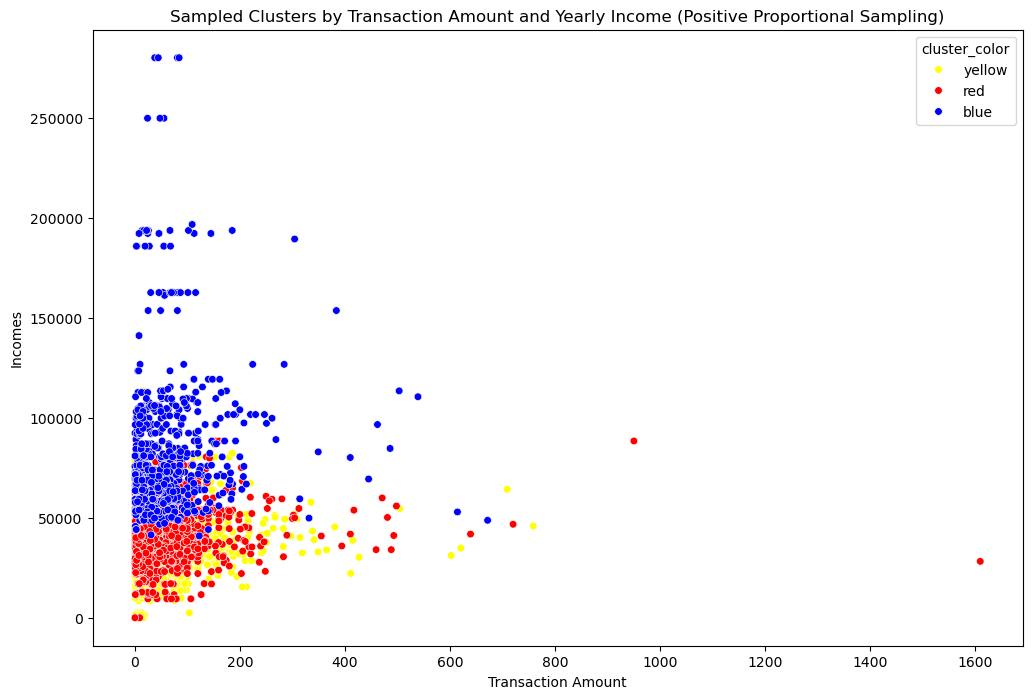

In [41]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['txn_amount'],
    y=sample_df['yearly_income_person'],
    hue=sample_df['cluster_color'],
    palette=palette,
    s=30)
plt.xlabel('Transaction Amount')
plt.ylabel('Incomes')
plt.title('Sampled Clusters by Transaction Amount and Yearly Income (Positive Proportional Sampling)')
plt.show()

When using transactions to create clustering it create a messy visualization due to the fact that people of all income levels
have regular small transactions. This creates a dense cloud of points around low transaction amounts, which overwhelms the plot
and hides the differences.There is also an issue with outliers that help compress the chart.

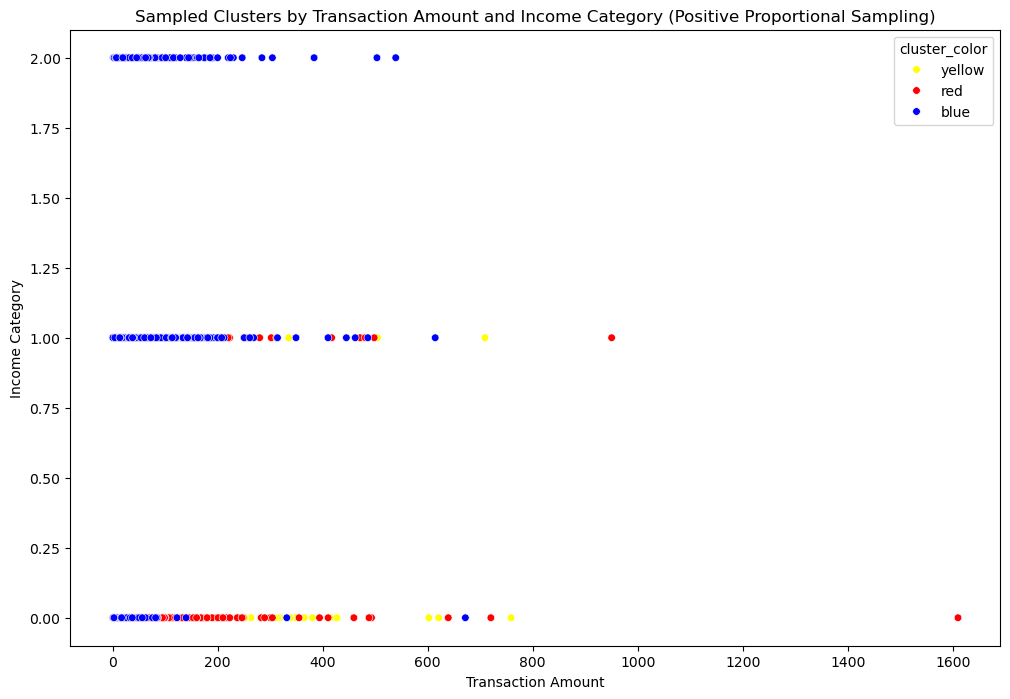

In [42]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['txn_amount'],
    y=sample_df['#_income_category'],
    hue=sample_df['cluster_color'],
    palette=palette,
    s=30)
plt.xlabel('Transaction Amount')
plt.ylabel('Income Category')
plt.title('Sampled Clusters by Transaction Amount and Income Category (Positive Proportional Sampling)')
plt.show()

#{0: Low Income, 1: Medium Income, 2: High Income} {Blue: 'High Debt', Red: 'Medium Debt', Low Debt: 'Low income'} 

Instead of using yearly income person, which is messy, we can simply use income category, which will allow us to segregate the income groups more clearly and make the clusters easier to interpret. This approach simplifies visualization, highlights patterns across different income levels, and provides a more intuitive understanding of how transaction behavior varies among low, medium, and high-income customers.

This visualization is interesting. We observe that most high-income users exhibit low transaction patterns, which could indicate effective money management. Medium-income users predominantly show low transaction patterns, suggesting their transactions are generally aligned with their income. Interestingly, the low-income group displays a few outlire transaction but for the most part nothing to high that will casue concern.

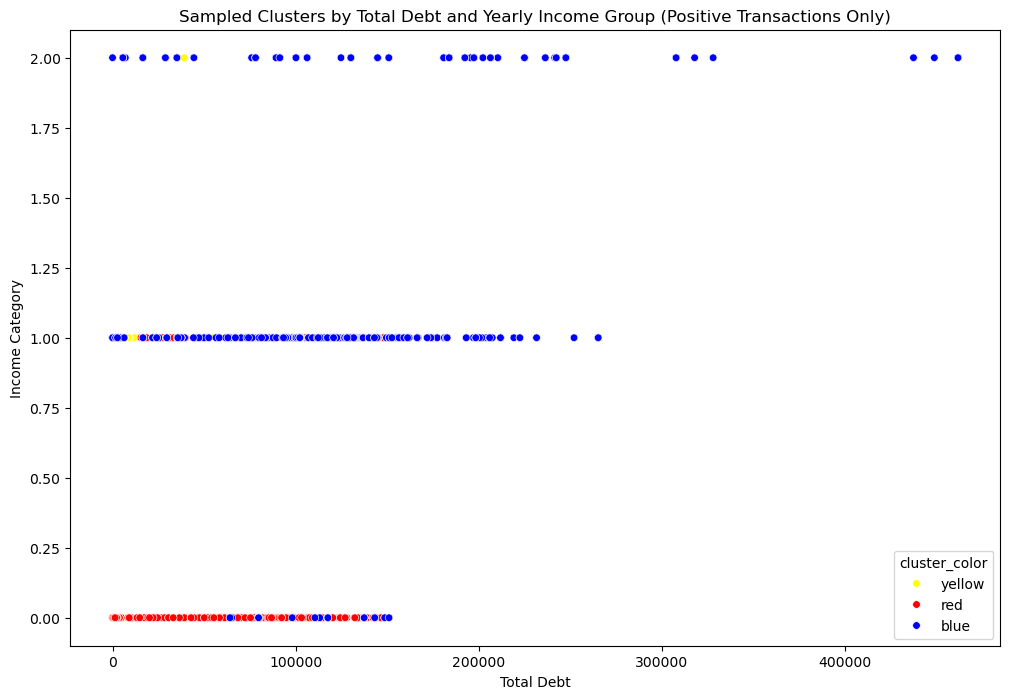

In [43]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['total_debt'],
    y=sample_df['#_income_category'],
    hue=sample_df['cluster_color'],
    palette=palette,
    s=30
)
plt.xlabel('Total Debt')
plt.ylabel('Income Category')
plt.title('Sampled Clusters by Total Debt and Yearly Income Group (Positive Transactions Only)')
plt.show()

#{0: Low Income, 1: Medium Income, 2: High Income}

High income (2): Fewer users, but a much wider debt range, with some individuals owing over 400k. This suggests that higher-income users are both more capable and more willing to take on large debts. 

Medium income (1): Debt levels go up to around 275k, placing them between low and high-income users in both capacity and spread — a moderate-risk middle group. A small percentage of this group shows tendencies of debt above their income means but nothing too concerning

Low income (0): Many users have smaller debt amounts, staying below 150k, indicating limited borrowing capacity or access to credit. A decent portion of this group shows tendencies of debt above their income means but base on the cluster summary this can just be higher income people that were grouped into the Low income based on the overall kmean algorithm.

Takeaway: As income increases, the distribution of debt becomes wider, showing more financial diversity and higher potential borrowing power among high-income users.

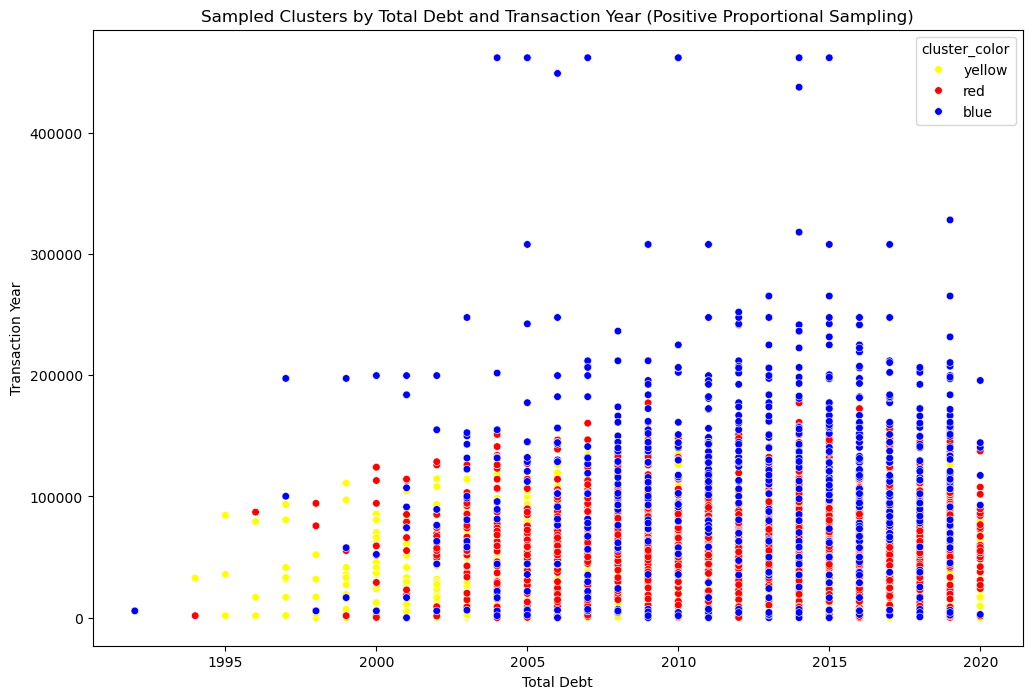

In [44]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['txn_year'],            
    y=sample_df['total_debt'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('Transaction Year')
plt.title('Sampled Clusters by Total Debt and Transaction Year (Positive Proportional Sampling)')
plt.show()


We see debt increasing throughout the years but also we see an increse of high income users as time passes.

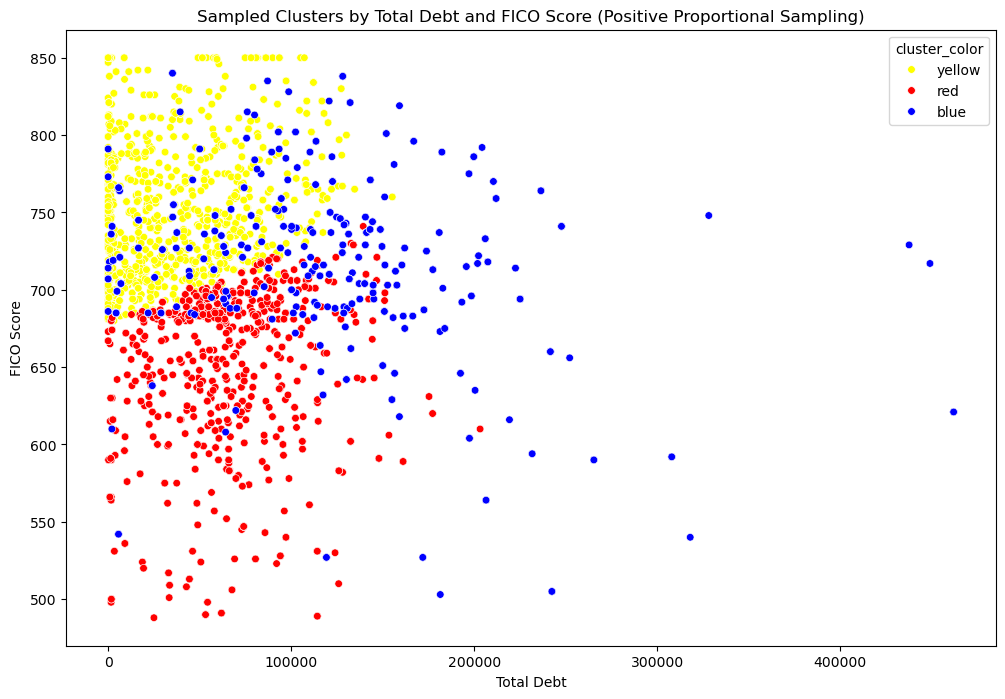

In [45]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['total_debt'],            
    y=sample_df['FICO_score'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('FICO Score')
plt.title('Sampled Clusters by Total Debt and FICO Score (Positive Proportional Sampling)')
plt.show()

{Blue: 'High Debt', Red: 'Medium Debt', Yellow: 'Low Debt'}

Blue Cluster: Users have very high debt which sometimes exeed 100k. The also tend to have good FICO score which indicate that the individual manage large amounts of debt responsibly. We do see some outliers.

Red Cluster: These users show a very tendency to have lower FICO scores. Although a good chuck have decent FICO scores there are many outliers.

Yellow Cluster: Users with minimal debt, mostly under 15k, and high credit scores..

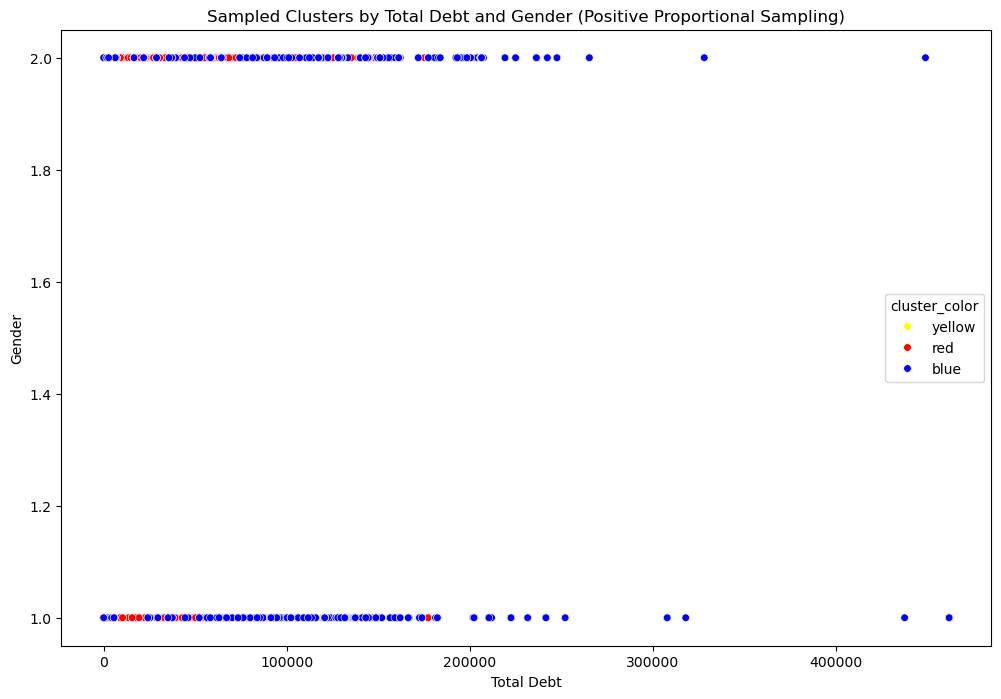

In [46]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['total_debt'],            
    y=sample_df['#_gender'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('Gender')
plt.title('Sampled Clusters by Total Debt and Gender (Positive Proportional Sampling)')
plt.show()

In [47]:
# See how many users there are from each gender
df['#_gender'].value_counts()

#_gender
1    12530541
2    11856292
Name: count, dtype: int64

{1: 'Female', 2: 'Male'}
Gender does not seem to be a huge factor as it pertains to total debt.

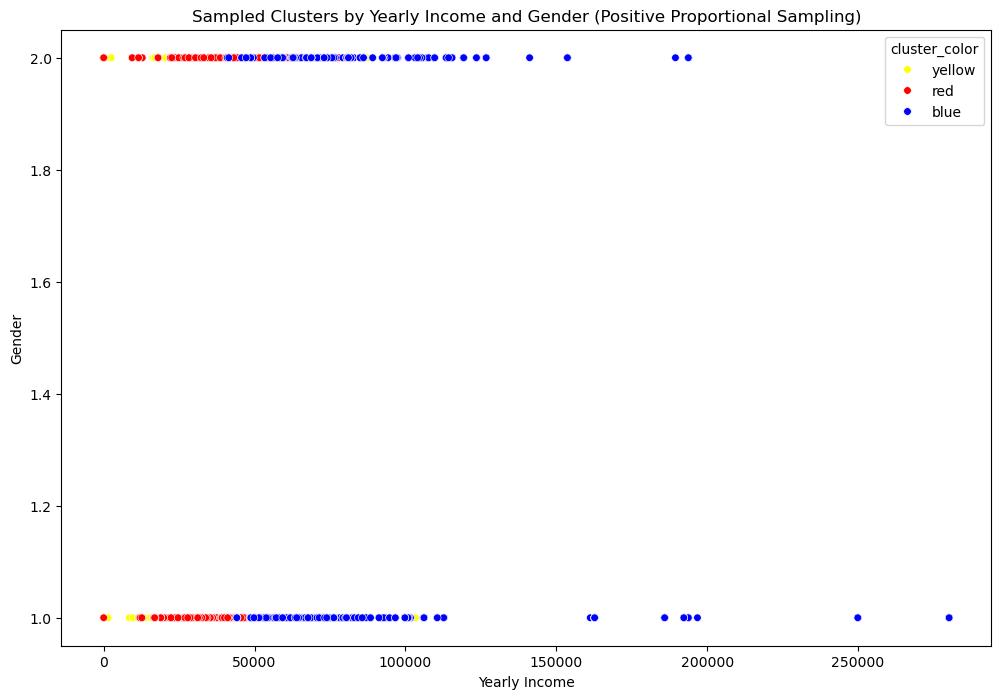

In [48]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['yearly_income_person'],            
    y=sample_df['#_gender'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Yearly Income')
plt.ylabel('Gender')
plt.title('Sampled Clusters by Yearly Income and Gender (Positive Proportional Sampling)')
plt.show()

{1: 'Female', 2: 'Male'}

Seems like for the most part gender does not play a huge role in the income. I believe we do see slightly more high income earners in the men group but the income outliers are in female group. It does seem like the data also has more middle income people in the female portion of the visualization.

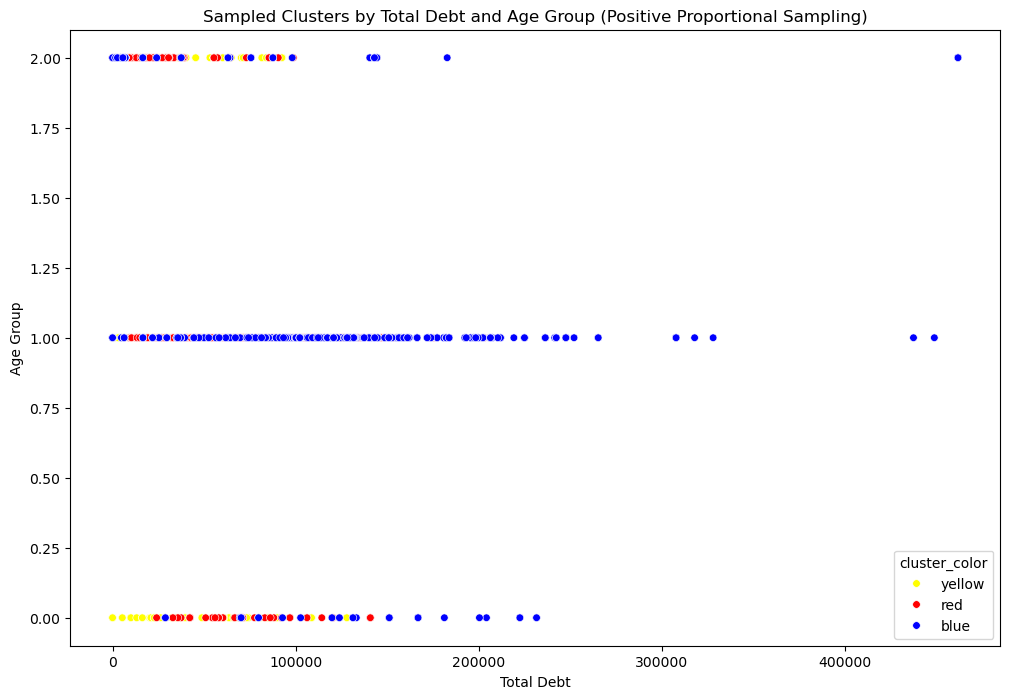

In [49]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['total_debt'],            
    y=sample_df['#_age_group'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('Age Group')
plt.title('Sampled Clusters by Total Debt and Age Group (Positive Proportional Sampling)')
plt.show()

{0: 'Young Adult', 1: 'Adult', 2: 'Senior'}

As expected more young adults and adults hold most of the debt. Seniors have lower debt overall except one outlier that seems to have the highest.

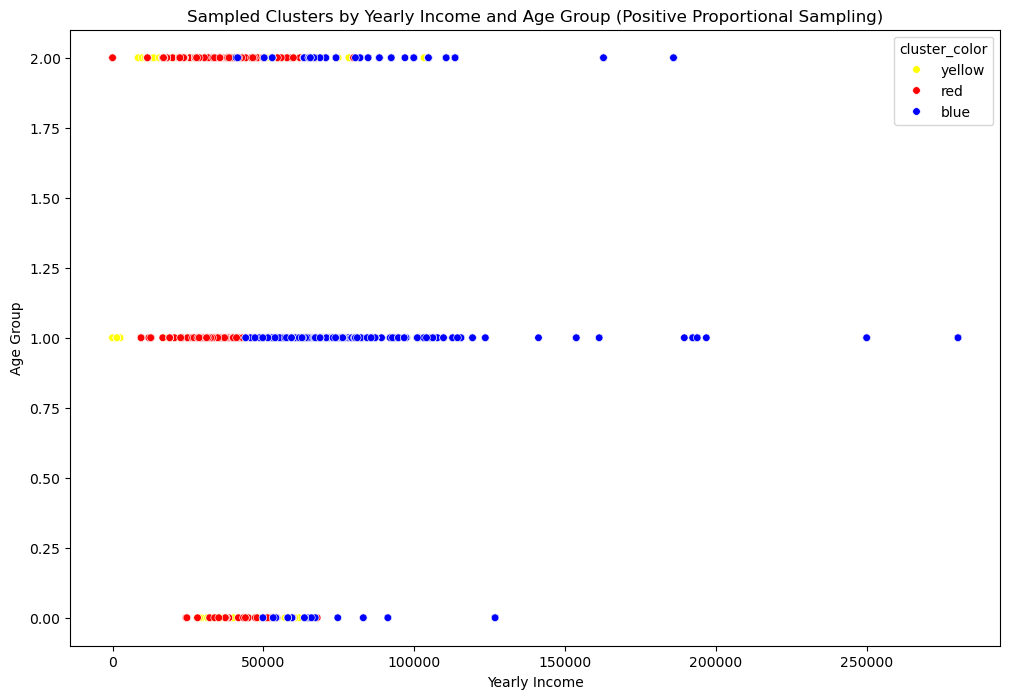

In [50]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=sample_df['yearly_income_person'],            
    y=sample_df['#_age_group'],              
   hue=sample_df['cluster_color'],
    palette=palette,
    s=30,
    legend=True
)
plt.xlabel('Yearly Income')
plt.ylabel('Age Group')
plt.title('Sampled Clusters by Yearly Income and Age Group (Positive Proportional Sampling)')
plt.show()

{0: 'Young Adult', 1: 'Adult', 2: 'Senior'}

As expected young adults are mostly in the lower income portion of the chart. Whats odd is that they dont go below a certain point unlike the other two age groups. Seniors might make more sense since they are pootentially no longer recienving income from work if they are retired but on the adult section its slightly odd that some income go so low.

### df_user_txn plot

In [51]:
df_user_txn['cluster'].value_counts()

cluster
0    13271716
1     7771888
2     3343229
Name: count, dtype: int64

In [52]:
df_user_txn.head()

,user_id,txn_avg,txn_sum,txn_count,yearly_income_person,total_debt,credit_limit,txn_year,FICO_score,#_age_group,#_income_category,#_gender,cluster,cluster_color
0,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue
1,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue
2,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue
3,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue
4,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue


In [53]:
# Group by cluster using the aggregated user txn (unscaled) data
cluster_summary2 = df_user_txn.groupby('cluster_color').agg({
    'total_debt': ['mean', 'median'],
    'FICO_score': ['mean', 'median'],
    'yearly_income_person': ['mean', 'median'],
    'credit_limit': ['mean', 'median']})

In [57]:
# View results
print(cluster_summary2)

                  total_debt            FICO_score         \
                        mean    median        mean median   
cluster_color                                               
blue           122860.459692  120771.0  708.480268  715.0   
red             65941.795341   63264.0  648.757921  661.0   
yellow          37946.306844   29627.0  750.667287  746.0   

              yearly_income_person           credit_limit           
                              mean   median          mean   median  
cluster_color                                                       
blue                  85713.893793  74016.0  30356.554380  26083.0  
red                   41646.960153  40336.0  11310.798731  10400.0  
yellow                39655.071913  37558.0  14215.840186  13034.0  


In [58]:
# No repeat users for plot
df_user_txn_unique = df_user_txn.drop_duplicates(subset='user_id', keep='first')

In [59]:
df_user_txn_unique.head()

,user_id,txn_avg,txn_sum,txn_count,yearly_income_person,total_debt,credit_limit,txn_year,FICO_score,#_age_group,#_income_category,#_gender,cluster,cluster_color
0,0,81.299989,1622991.69,19963,59696.0,127613.0,24295.0,2002,787,1,1,1,2,blue
19963,1,81.118050,723491.89,8919,77254.0,191349.0,27500.0,2003,701,1,1,1,2,blue
28882,2,35.159687,1475933.36,41978,33483.0,196.0,31599.0,2009,698,2,0,1,0,yellow
70860,3,117.277603,1186497.51,10117,249925.0,202328.0,98100.0,2010,722,1,2,1,2,blue
80977,4,97.011698,1798790.91,18542,109687.0,183855.0,34900.0,1999,675,1,2,2,2,blue


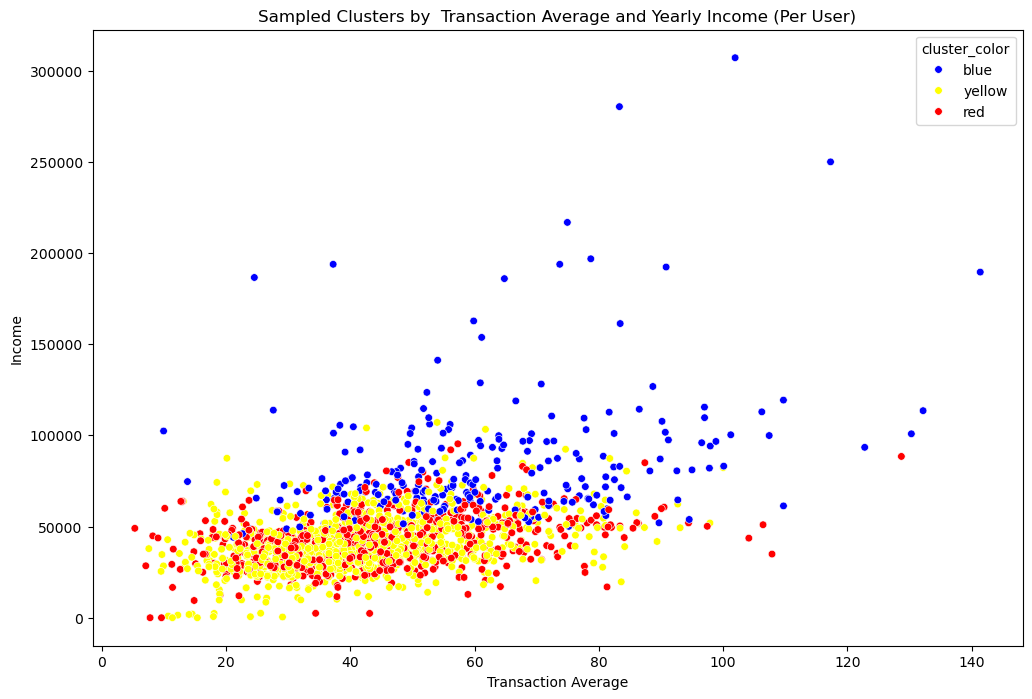

In [66]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['txn_avg'],            
    y=df_user_txn_unique['yearly_income_person'],             
    hue=df_user_txn_unique['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('Transaction Average')
plt.ylabel('Income')
plt.title('Sampled Clusters by  Transaction Average and Yearly Income (Per User)')
plt.show()

This visualization is hard to decipher as all the clusters are on top of each other. For better interpretation we have to look at the table to compare the clusters. For the most part transactions average increses with income but its not definitive.

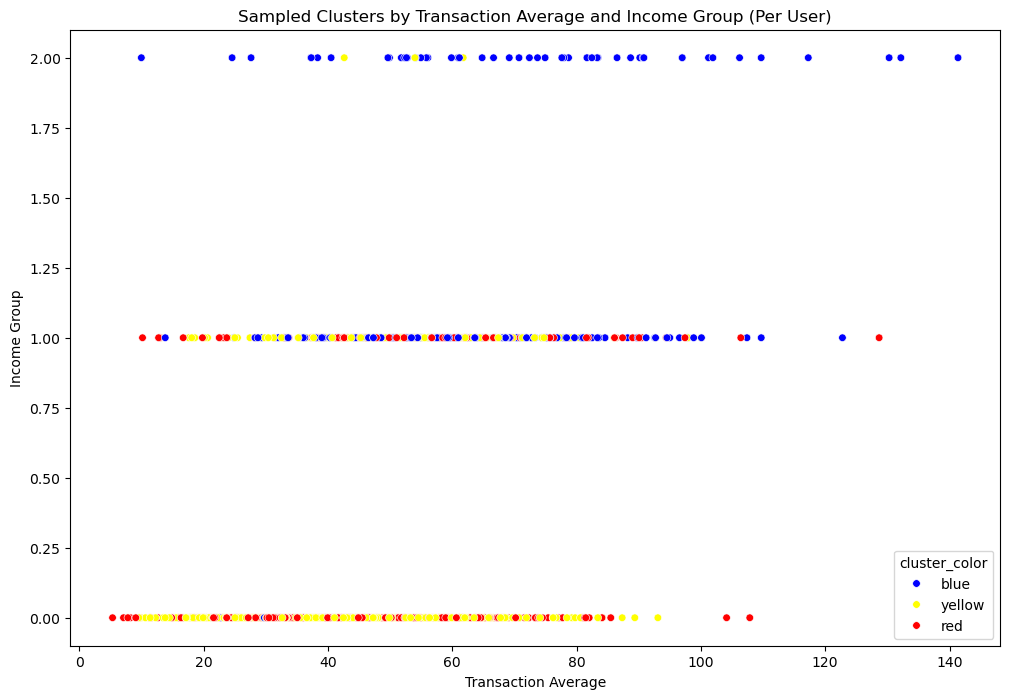

In [67]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['txn_avg'],            
    y=df_user_txn_unique['#_income_category'],             
    hue=df_user_txn_unique['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('Transaction Average')
plt.ylabel('Income Group')
plt.title('Sampled Clusters by Transaction Average and Income Group (Per User)')
plt.show()

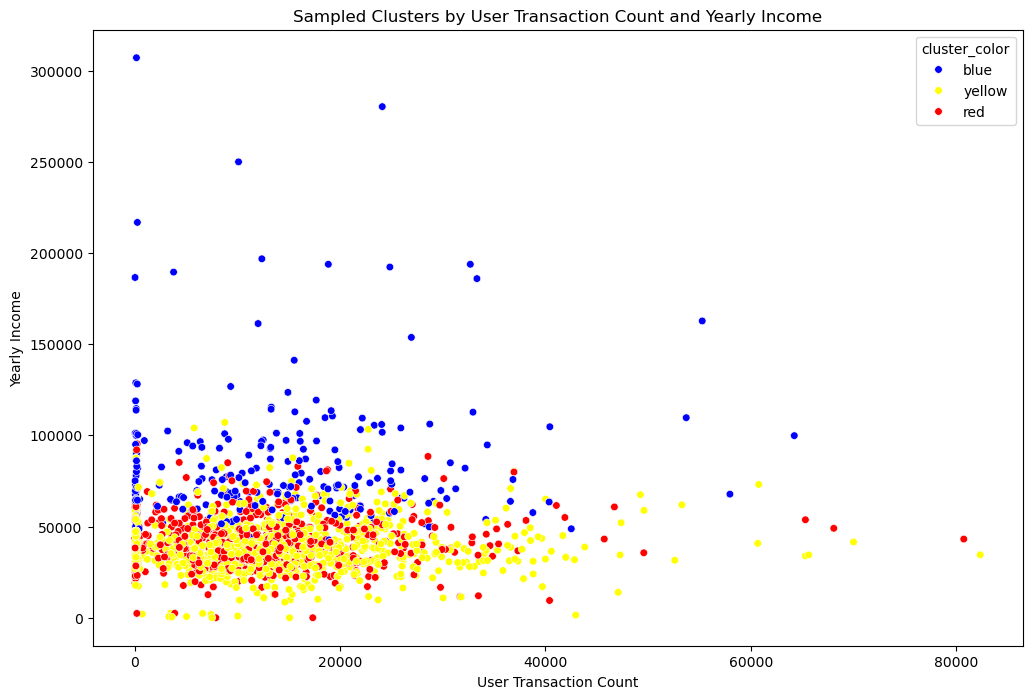

In [70]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['txn_count'],            
    y=df_user_txn_unique['yearly_income_person'],              
    hue=df_user_txn_unique['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('User Transaction Count')
plt.ylabel('Yearly Income')
plt.title('Sampled Clusters by User Transaction Count and Yearly Income')
plt.show()

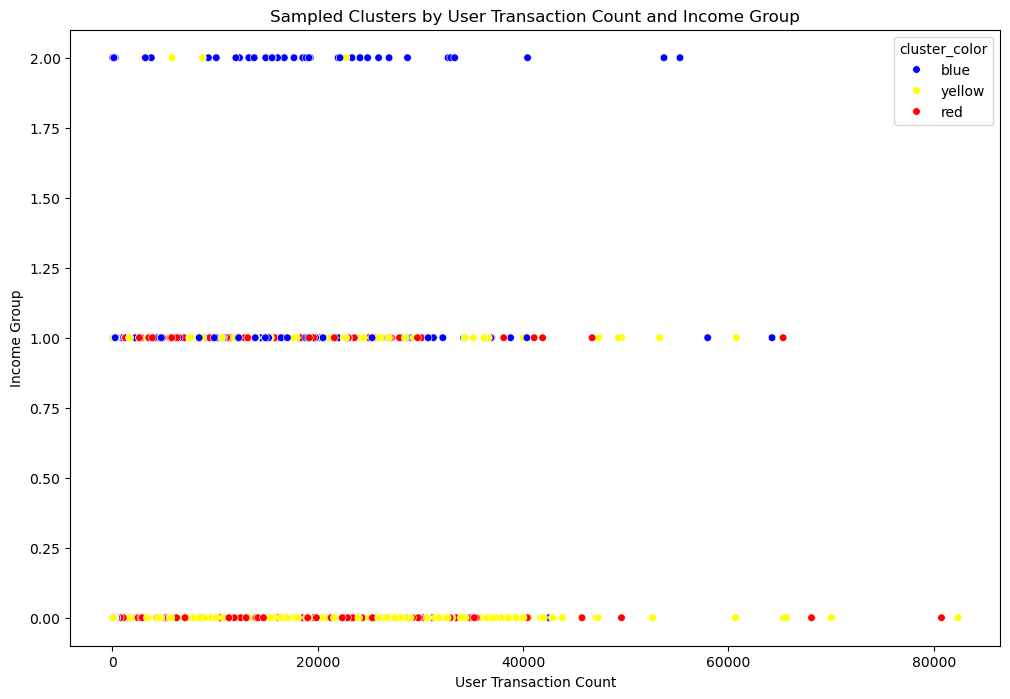

In [73]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['txn_count'],            
    y=df_user_txn_unique['#_income_category'],              
    hue=df_user_txn_unique['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('User Transaction Count')
plt.ylabel('Income Group')
plt.title('Sampled Clusters by User Transaction Count and Income Group')
plt.show()

#{0: Low Income, 1: Medium Income, 2: High Income}

It looks like high income users do less transactions than the other groups.

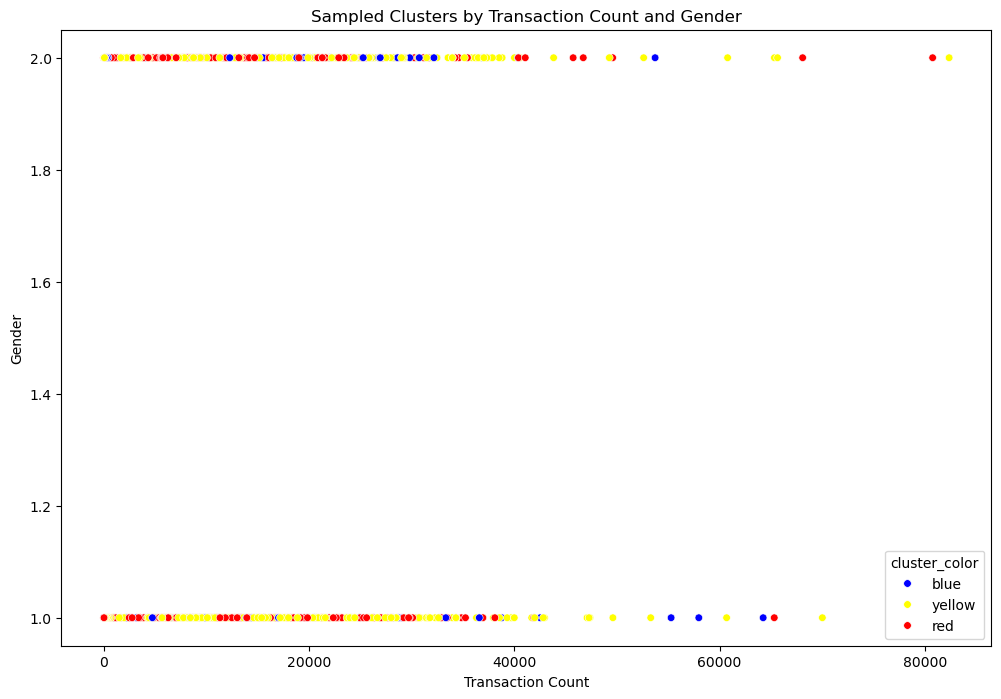

In [76]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['txn_count'],            
    y=df_user_txn_unique['#_gender'],              
    hue=df_user_txn['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('Transaction Count')
plt.ylabel('Gender')
plt.title('Sampled Clusters by Transaction Count and Gender')
plt.show()

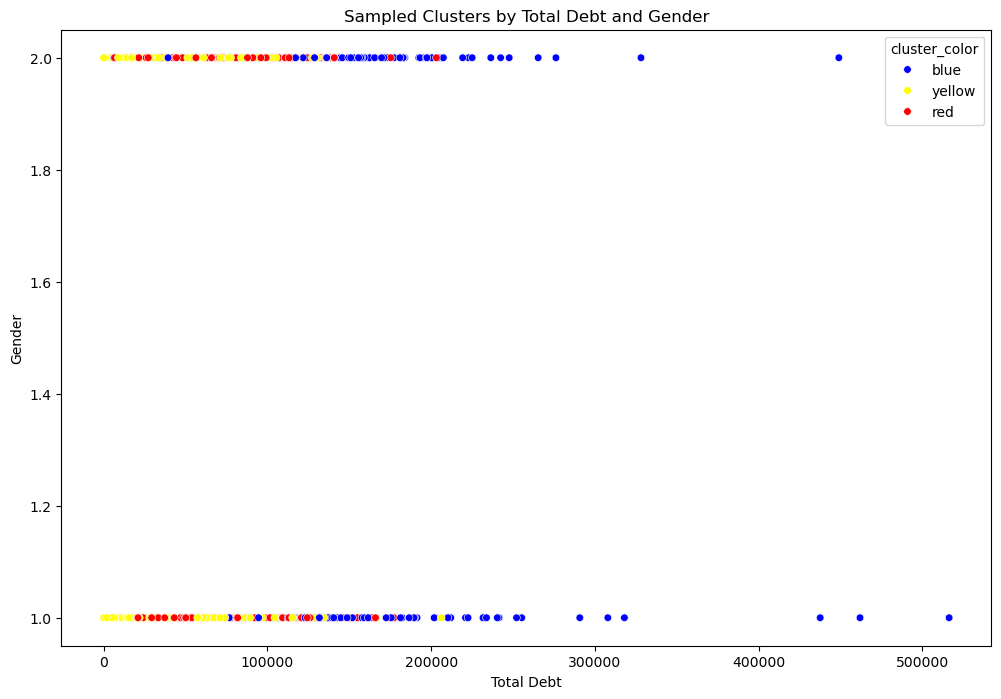

In [75]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['total_debt'],            
    y=df_user_txn_unique['#_gender'],              
    hue=df_user_txn['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('Gender')
plt.title('Sampled Clusters by Total Debt and Gender')
plt.show()

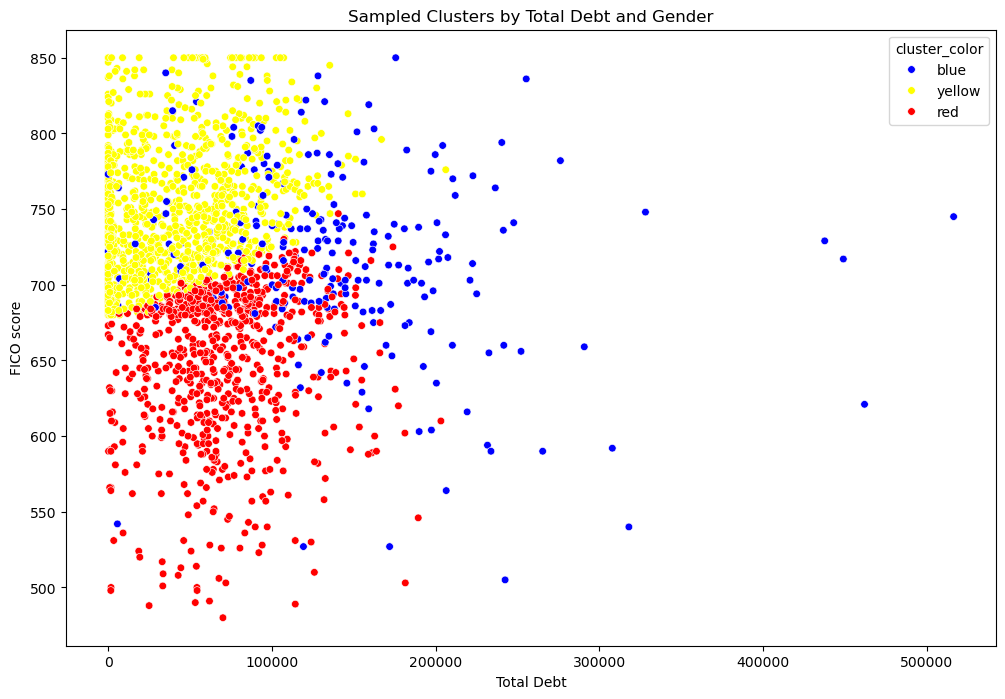

In [77]:
# Take a random sample to keep the plot efficient
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df_user_txn_unique['total_debt'],            
    y=df_user_txn_unique['FICO_score'],              
    hue=df_user_txn['cluster_color'],    
    s=30,
    palette=palette,
    legend=True
)
plt.xlabel('Total Debt')
plt.ylabel('FICO score')
plt.title('Sampled Clusters by Total Debt and Gender')
plt.show()

Viewing the information on a user level doesn't change the information it only serves to plot fewer data points.